Based on https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption

As a novice in applied data science, I believe that learning from peers is crucial. However, it is even more essential to acknowledge and cite the individuals and sources that have influenced my journey. Below are the references for the current notebook: <br>
https://www.youtube.com/watch?v=vV12dGe_Fho&list=PL7RwtdVQXQ8o6CYe1Teo7FzkrQQoT0c9i&index=6&ab_channel=RobMulla


# Modules Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

# Data Exploration

In [2]:
df = pd.read_csv('../../datasets/hourly energy consumption/PJME_hourly.csv')

In [3]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

<Axes: title={'center': 'PJME Energy use in MW'}, xlabel='Datetime'>

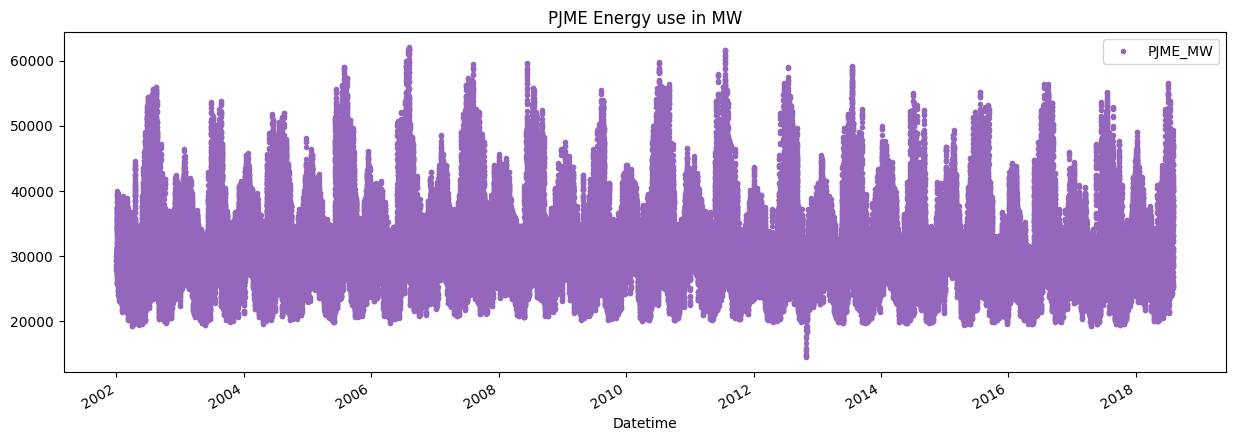

In [4]:
color_palette = sns.color_palette()
df.plot(style='.', figsize=(15,5), color=color_palette[4], title="PJME Energy use in MW")

# Pipeline

In [5]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

In [6]:
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [7]:
train

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2014-01-01 20:00:00,36193.0
2014-01-01 21:00:00,35601.0
2014-01-01 22:00:00,34242.0


In [8]:
test

,PJME_MW
Datetime,
2015-01-01 00:00:00,32802.0
2015-12-31 01:00:00,24305.0
2015-12-31 02:00:00,23156.0
2015-12-31 03:00:00,22514.0
2015-12-31 04:00:00,22330.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


<Axes: xlabel='Datetime'>

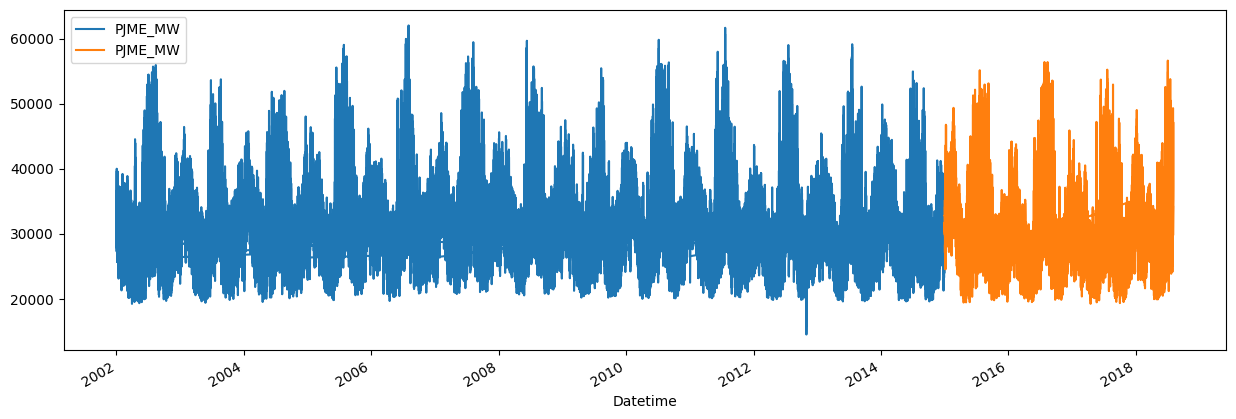

In [9]:
fix, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label="Training set")
test.plot(ax=ax, label="Test set")

<Axes: title={'center': 'Week Worth of Data'}, xlabel='Datetime'>

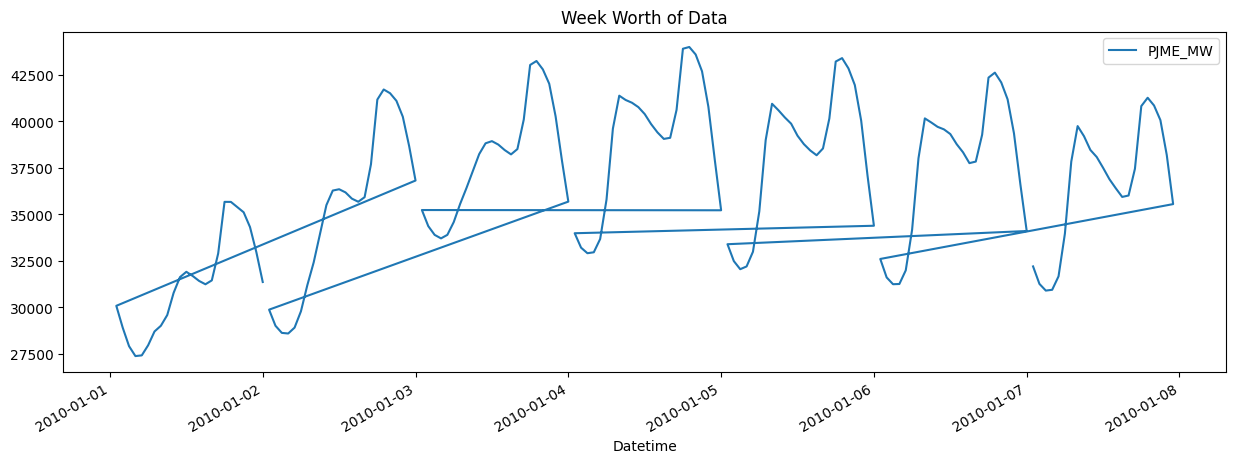

In [10]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15,5), title="Week Worth of Data")

<Axes: title={'center': 'Week Worth of Data'}, xlabel='Datetime'>

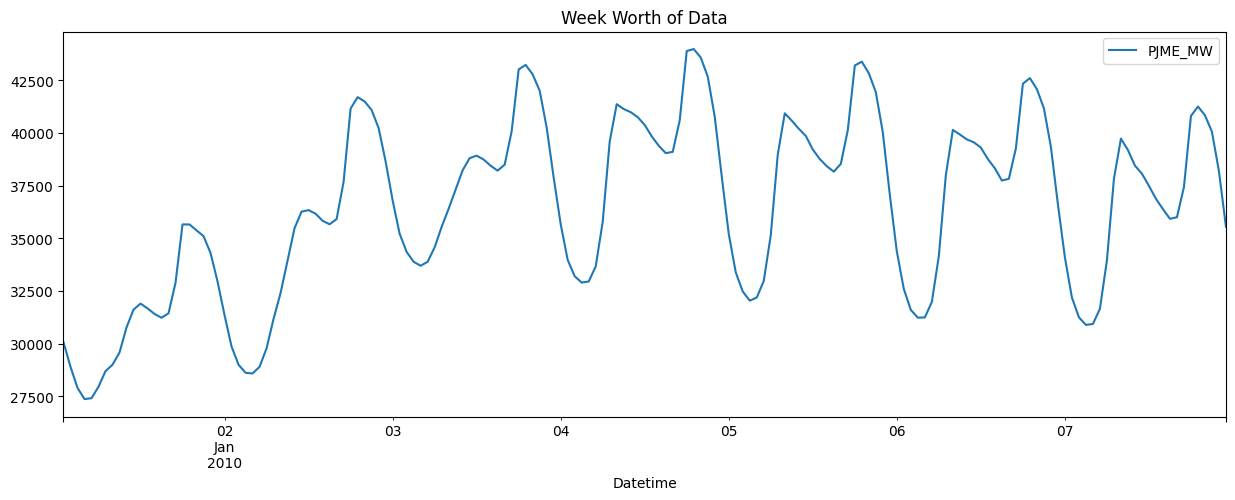

In [11]:
df = df.sort_index()
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15,5), title="Week Worth of Data")

# Feature Engineering

In [12]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.day_of_week
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear

In [13]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']
print(train.head())
print(test.head())

                     PJME_MW  hour  dayofweek  month  quarter  year  dayofyear
Datetime                                                                      
2002-01-01 01:00:00  30393.0     1          1      1        1  2002          1
2002-01-01 02:00:00  29265.0     2          1      1        1  2002          1
2002-01-01 03:00:00  28357.0     3          1      1        1  2002          1
2002-01-01 04:00:00  27899.0     4          1      1        1  2002          1
2002-01-01 05:00:00  28057.0     5          1      1        1  2002          1
                     PJME_MW  hour  dayofweek  month  quarter  year  dayofyear
Datetime                                                                      
2015-01-01 00:00:00  32802.0     0          3      1        1  2015          1
2015-01-01 01:00:00  31647.0     1          3      1        1  2015          1
2015-01-01 02:00:00  30755.0     2          3      1        1  2015          1
2015-01-01 03:00:00  30189.0     3          3      1

In [14]:
train = df.loc[df.index < '2015-01-01']
X_train = train.drop(columns=["PJME_MW"])
y_train = pd.DataFrame(train["PJME_MW"], columns=["PJME_MW"])
X_test = test.drop(columns=["PJME_MW"])
y_test = pd.DataFrame(test["PJME_MW"], columns=["PJME_MW"])

## Feature visualization

Text(0.5, 1.0, 'MW by hour')

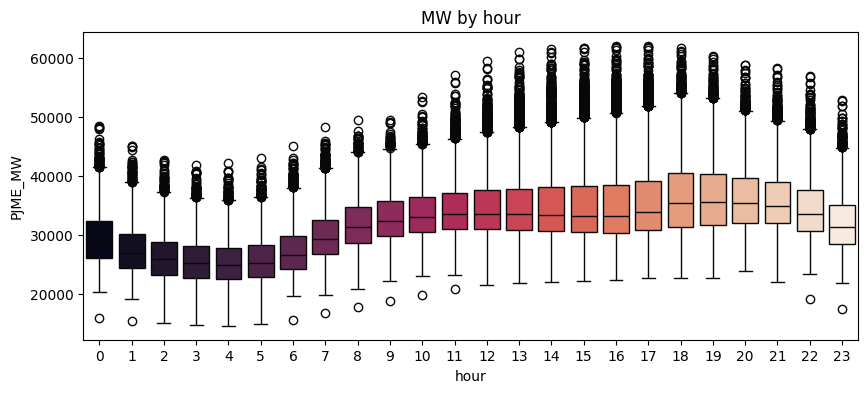

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df, x='hour', y='PJME_MW', hue='hour', palette='rocket', legend=False)
ax.set_title('MW by hour')

C:\Users\Cyril\AppData\Local\Temp\ipykernel_4976\1110041050.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='PJME_MW', palette='rocket', ax=ax)


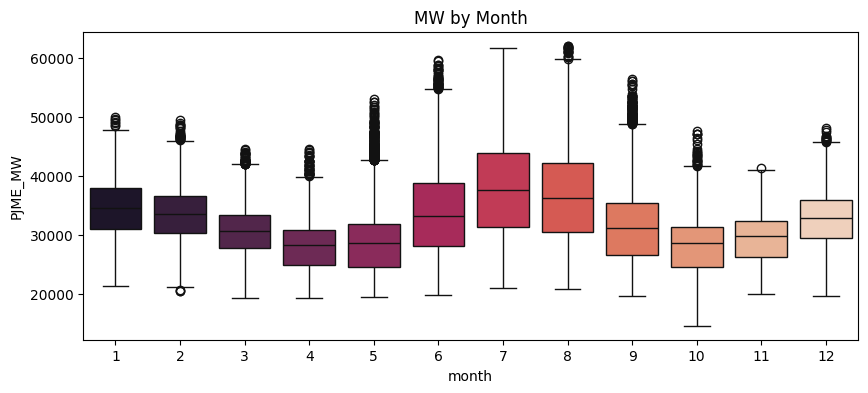

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='rocket', ax=ax)

ax.set_title('MW by Month')
plt.show()


# Training models

In [17]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                           learning_rate=0.001, n_jobs=-1)
xgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

[0]	validation_0-rmse:6447.78573	validation_1-rmse:6517.54145
[100]	validation_0-rmse:6026.49339	validation_1-rmse:6131.08053
[200]	validation_0-rmse:5654.75124	validation_1-rmse:5796.65490
[300]	validation_0-rmse:5326.88030	validation_1-rmse:5505.59274
[400]	validation_0-rmse:5039.56899	validation_1-rmse:5253.21086
[500]	validation_0-rmse:4788.58887	validation_1-rmse:5034.74880
[600]	validation_0-rmse:4565.97498	validation_1-rmse:4847.76655
[700]	validation_0-rmse:4372.19812	validation_1-rmse:4687.11295
[800]	validation_0-rmse:4202.53312	validation_1-rmse:4547.57144
[900]	validation_0-rmse:4055.65261	validation_1-rmse:4427.00726
[999]	validation_0-rmse:3929.32983	validation_1-rmse:4325.35302


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

<Axes: xlabel='Features', ylabel='Count'>

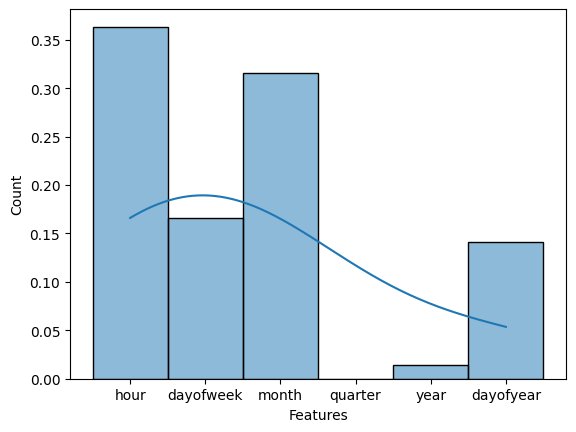

In [18]:
feature_importances = xgb_reg.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})

sns.histplot(data=importance_df, x='Features', weights='Importance', discrete=True, kde=True)

<Axes: xlabel='horsepower', ylabel='Density'>

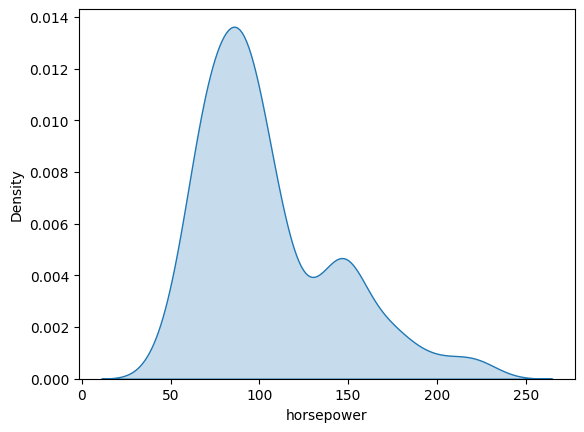

In [35]:
#//# kde plot
cars = sns.load_dataset('mpg').dropna()
sns.kdeplot(cars.horsepower, fill=True, bw_adjust=1)


<Axes: xlabel='horsepower', ylabel='Density'>

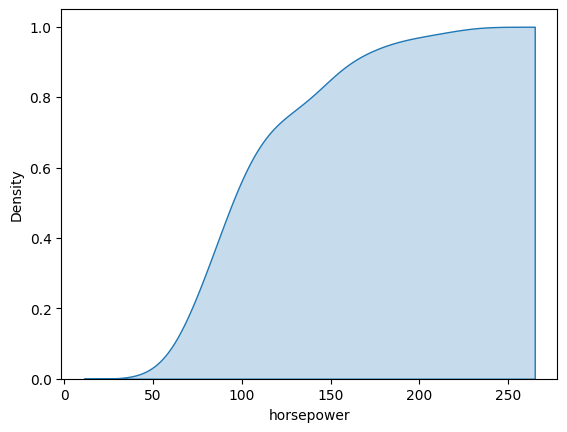

In [20]:
sns.kdeplot(cars.horsepower, fill=True, bw_adjust=1, cumulative=True) #//#

<Axes: xlabel='horsepower', ylabel='mpg'>

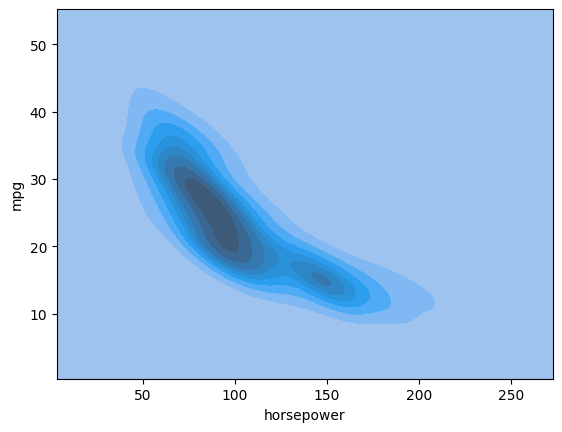

In [36]:
import numpy as np
sns.kdeplot(x=cars.horsepower, y=cars.mpg, levels=np.linspace(0, 1, 10), fill=True,
            thresh=True)

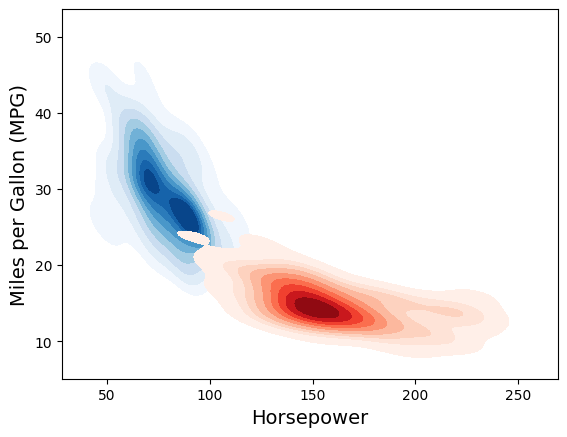

In [47]:
cyl_4 = cars[cars.cylinders == 4]
cyl_8 = cars[cars.cylinders == 8]

sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg,
            cmap="Blues", fill=True)

sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg,
            cmap="Reds", fill=True)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)
plt.show()


# Models Evaluation

## Feature importance

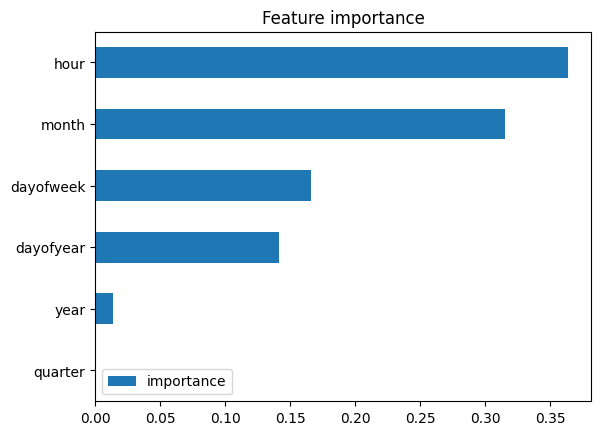

In [23]:
fi = pd.DataFrame(data=xgb_reg.feature_importances_,
             index=xgb_reg.feature_names_in_,
             columns=['importance'])

fi.sort_values('importance').plot(kind='barh', title='Feature importance')
plt.show()

In [24]:
test.loc[:, 'prediction'] = xgb_reg.predict(X_test)

C:\Users\Cyril\AppData\Local\Temp\ipykernel_4976\3219832244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'prediction'] = xgb_reg.predict(X_test)


In [25]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

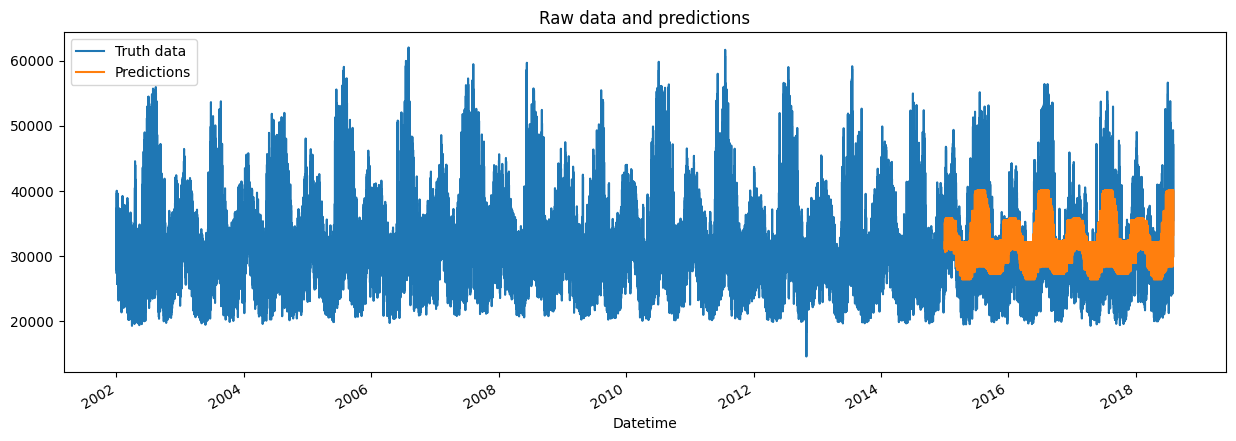

In [54]:
# plotting predictions
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth data', 'Predictions'])
ax.set_title('Raw data and predictions')
plt.show()

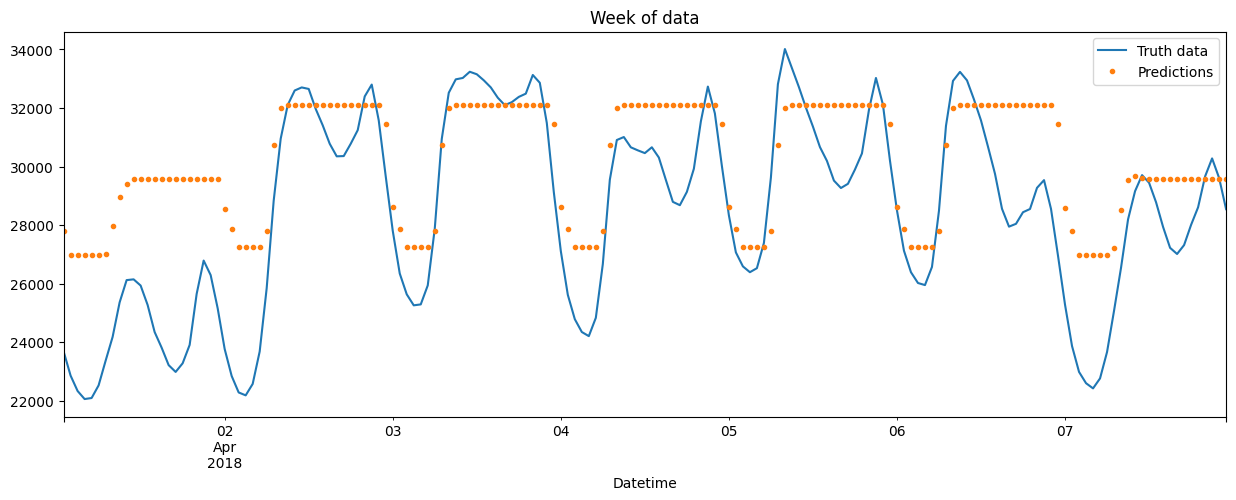

In [27]:
 # plotting predictions
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'].plot(figsize=(15,5), title='Week of data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'].plot(style='.')
plt.legend(['Truth data', 'Predictions'])
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(test['PJME_MW'], test['prediction']))
print("RMSE: ", np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction'])))

MSE: 18708678.77774586
RMSE:  4325.353023482114
